# 9.1.5. Intro to GLM Analysis: a single-session, single-subject fMRI dataset
https://nilearn.github.io/auto_examples/plot_single_subject_single_run.html#sphx-glr-auto-examples-plot-single-subject-single-run-py

In [2]:
from nilearn.datasets import fetch_spm_auditory
import os

In [3]:
cwd = os.getcwd()
subject_data = fetch_spm_auditory(cwd)


Dataset created in /Users/martinszinte/Dropbox/Data/Martin/Experiments/nilearn_tuto/spm_auditory

Data absent, downloading...


Downloaded 29949952 of 34212021 bytes (87.5%,    0.9s remaining) ...done. (7 seconds, 0 min)
Extracting data from /Users/martinszinte/Dropbox/Data/Martin/Experiments/nilearn_tuto/spm_auditory/sub001/MoAEpilot.zip..... done.


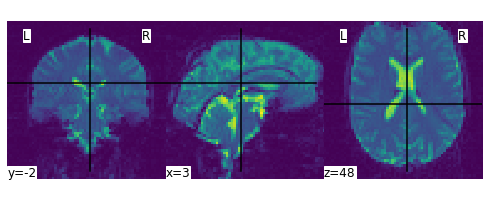

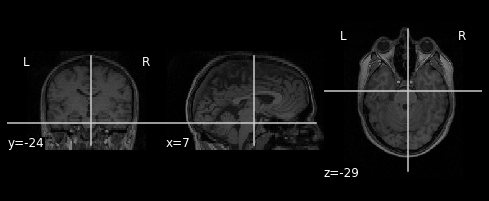

In [17]:
from nilearn.plotting import plot_stat_map, plot_anat, plot_img
plot_img(subject_data.func[0])
plot_anat(subject_data.anat)

In [18]:
from nilearn.image import concat_imgs, mean_img
fmri_img = concat_imgs(subject_data.func)
mean_img = mean_img(fmri_img)

In [19]:
subject_data['events']

'/Users/martinszinte/Dropbox/Data/Martin/Experiments/nilearn_tuto/spm_auditory/sub001/fM00223/fM00223_events.tsv'

In [20]:
import pandas as pd
events = pd.read_table(subject_data['events'])
events

,onset,duration,trial_type
0,0.0,42.0,rest
1,42.0,42.0,active
2,84.0,42.0,rest
3,126.0,42.0,active
4,168.0,42.0,rest
5,210.0,42.0,active
6,252.0,42.0,rest
7,294.0,42.0,active
8,336.0,42.0,rest
9,378.0,42.0,active


In [23]:
from nilearn.glm.first_level import FirstLevelModel
fmri_glm = FirstLevelModel(t_r=7,
                           noise_model='ar1',
                           standardize=False,
                           hrf_model='spm',
                           drift_model='cosine',
                           high_pass=.01,
                           verbose=1)

In [24]:
fmri_glm = fmri_glm.fit(fmri_img, events)

Computing run 1 out of 1 runs (go take a coffee, a big one)

Computation of 1 runs done in 0 seconds



In [25]:
design_matrix = fmri_glm.design_matrices_[0]

In [ ]:
fmri_glm.design_matrices_

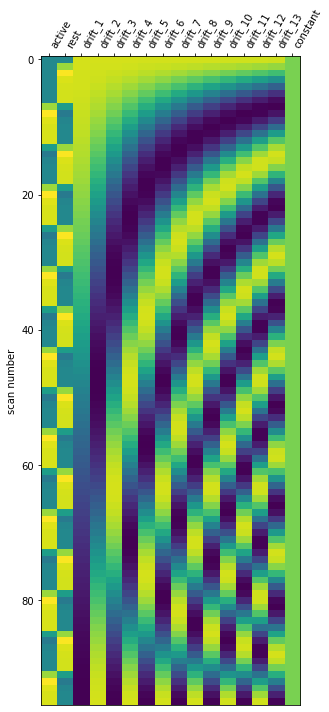

In [29]:
from nilearn.plotting import plot_design_matrix
plot_design_matrix(design_matrix)


In [30]:
from numpy import array
conditions = {
    'active': array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                     0.]),
    'rest':   array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                     0.]),
}

In [31]:
active_minus_rest = conditions['active'] - conditions['rest']

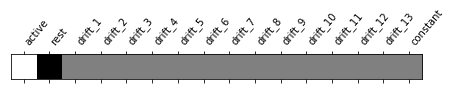

In [33]:
from nilearn.plotting import plot_contrast_matrix
plot_contrast_matrix(active_minus_rest, design_matrix=design_matrix)

In [34]:
eff_map = fmri_glm.compute_contrast(active_minus_rest,
                                    output_type='effect_size')

/Users/martinszinte/anaconda3/envs/idp/lib/python3.7/site-packages/nilearn/_utils/glm.py:300: RuntimeWarning: divide by zero encountered in true_divide
  return np.where(X <= 0, 0, 1. / X)


In [38]:
z_map = fmri_glm.compute_contrast(active_minus_rest,
                                  output_type='z_score')

/Users/martinszinte/anaconda3/envs/idp/lib/python3.7/site-packages/nilearn/_utils/glm.py:300: RuntimeWarning: divide by zero encountered in true_divide
  return np.where(X <= 0, 0, 1. / X)


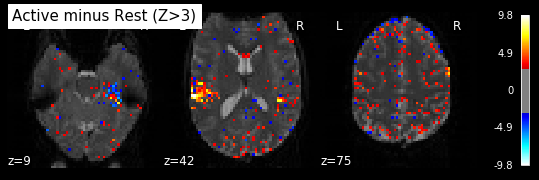

In [39]:
plot_stat_map(z_map, bg_img=mean_img, threshold=3.0,
              display_mode='z', cut_coords=3, black_bg=True,
              title='Active minus Rest (Z>3)')

Uncorrected p<0.001 threshold: 3.291


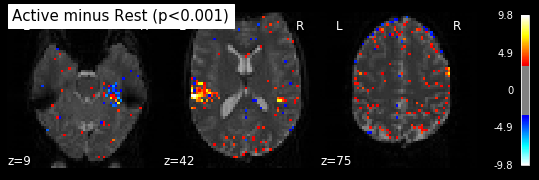

In [40]:
from nilearn.glm import threshold_stats_img
_, threshold = threshold_stats_img(z_map, alpha=.001, height_control='fpr')
print('Uncorrected p<0.001 threshold: %.3f' % threshold)
plot_stat_map(z_map, bg_img=mean_img, threshold=threshold,
              display_mode='z', cut_coords=3, black_bg=True,
              title='Active minus Rest (p<0.001)')

Bonferroni-corrected, p<0.05 threshold: 4.934


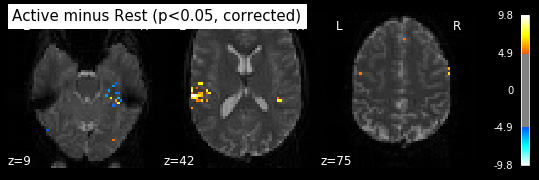

In [41]:
_, threshold = threshold_stats_img(
    z_map, alpha=.05, height_control='bonferroni')
print('Bonferroni-corrected, p<0.05 threshold: %.3f' % threshold)
plot_stat_map(z_map, bg_img=mean_img, threshold=threshold,
              display_mode='z', cut_coords=3, black_bg=True,
              title='Active minus Rest (p<0.05, corrected)')

False Discovery rate = 0.05 threshold: 2.905


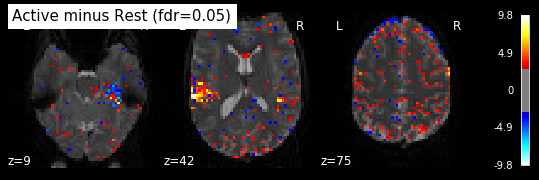

In [43]:
_, threshold = threshold_stats_img(z_map, alpha=.05, height_control='fdr')
print('False Discovery rate = 0.05 threshold: %.3f' % threshold)
plot_stat_map(z_map, bg_img=mean_img, threshold=threshold,
              display_mode='z', cut_coords=3, black_bg=True,
              title='Active minus Rest (fdr=0.05)')

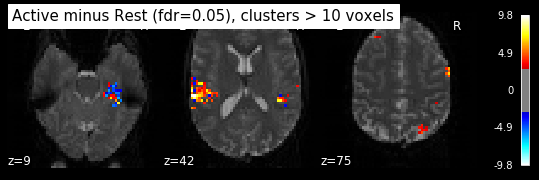

In [45]:
clean_map, threshold = threshold_stats_img(
    z_map, alpha=.05, height_control='fdr', cluster_threshold=10)
plot_stat_map(clean_map, bg_img=mean_img, threshold=threshold,
              display_mode='z', cut_coords=3, black_bg=True,
              title='Active minus Rest (fdr=0.05), clusters > 10 voxels')

In [49]:
from os.path import join
z_map.to_filename(join(cwd, 'active_vs_rest_z_map.nii.gz'))
eff_map.to_filename(join(cwd, 'active_vs_rest_eff_map.nii.gz'))

# 9.5.12. Understanding parameters of the first-level model
https://nilearn.github.io/auto_examples/04_glm_first_level/plot_first_level_details.html#sphx-glr-auto-examples-04-glm-first-level-plot-first-level-details-py

In [51]:
from nilearn.datasets import func
data = func.fetch_localizer_first_level(cwd)
fmri_img = data.epi_img


Dataset created in /Users/martinszinte/Dropbox/Data/Martin/Experiments/nilearn_tuto/localizer_first_level



 ...done. (3 seconds, 0 min)
Extracting data from /Users/martinszinte/Dropbox/Data/Martin/Experiments/nilearn_tuto/localizer_first_level/775984ff61321050eba8738c4176eda5/download..... done.


In [54]:
fmri_img

'/Users/martinszinte/Dropbox/Data/Martin/Experiments/nilearn_tuto/localizer_first_level/localizer_first_level/sub-12069_task-localizer_space-MNI305.nii.gz'

In [55]:
t_r = 2.4
events_file = data['events']
import pandas as pd
events = pd.read_table(events_file)
events

,trial_type,onset,duration
0,visual_computation,0.000000,1.0
1,visual_computation,2.400000,1.0
2,horizontal_checkerboard,8.700000,1.0
3,audio_right_hand_button_press,11.400000,1.0
4,sentence_listening,15.000000,1.0
...,...,...,...
75,sentence_listening,284.399994,1.0
76,sentence_reading,288.000000,1.0
77,visual_right_hand_button_press,291.000000,1.0
78,sentence_listening,293.399994,1.0


In [56]:
from nilearn.glm.first_level import FirstLevelModel
first_level_model = FirstLevelModel(t_r)
first_level_model = first_level_model.fit(fmri_img, events=events)
design_matrix = first_level_model.design_matrices_[0]

In [57]:
design_matrix

,audio_computation,audio_left_hand_button_press,audio_right_hand_button_press,horizontal_checkerboard,sentence_listening,sentence_reading,vertical_checkerboard,visual_computation,visual_left_hand_button_press,visual_right_hand_button_press,drift_1,drift_2,drift_3,drift_4,drift_5,drift_6,constant
0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.124991,0.124962,0.124915,0.124849,0.124765,0.124661,1.0
2.4,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.023498,0.0,0.000000,0.124915,0.124661,0.124238,0.123647,0.122888,0.121963,1.0
4.8,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.227471,0.0,0.000000,0.124765,0.124060,0.122888,0.121254,0.119163,0.116624,1.0
7.2,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.421450,0.0,0.000000,0.124539,0.123160,0.120872,0.117693,0.113646,0.108761,1.0
9.6,0.0,0.0,0.0,0.000087,0.000000,0.000000,0.000000,0.303107,0.0,0.000000,0.124238,0.121963,0.118201,0.112999,0.106419,0.098543,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295.2,0.0,0.0,0.0,-0.001442,0.029960,0.226375,-0.033864,0.000000,0.0,0.143638,-0.124238,0.121963,-0.118201,0.112999,-0.106419,0.098543,1.0
297.6,0.0,0.0,0.0,-0.000399,0.119703,0.086440,-0.017507,0.000000,0.0,0.240781,-0.124539,0.123160,-0.120872,0.117693,-0.113646,0.108761,1.0
300.0,0.0,0.0,0.0,-0.000086,0.283598,-0.016946,-0.007174,0.000000,0.0,0.122632,-0.124765,0.124060,-0.122888,0.121254,-0.119163,0.116624,1.0
302.4,0.0,0.0,0.0,-0.000007,0.345040,-0.044646,-0.002478,0.000000,0.0,0.001386,-0.124915,0.124661,-0.124238,0.123647,-0.122888,0.121963,1.0


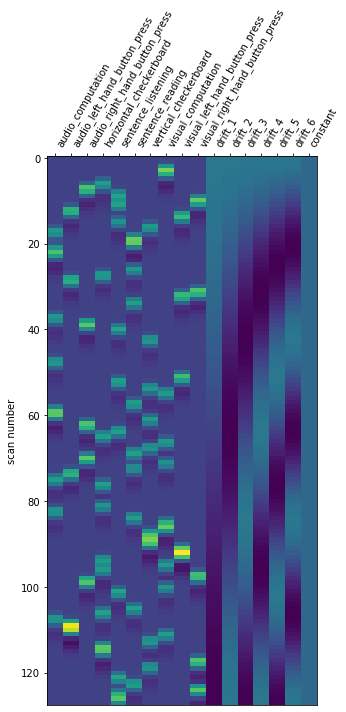

In [58]:
from nilearn.plotting import plot_design_matrix
plot_design_matrix(design_matrix)

In [59]:
import numpy as np

def make_localizer_contrasts(design_matrix):
    """ returns a dictionary of four contrasts, given the design matrix"""

    # first generate canonical contrasts
    contrast_matrix = np.eye(design_matrix.shape[1])
    contrasts = dict([(column, contrast_matrix[i])
                      for i, column in enumerate(design_matrix.columns)])

    contrasts['audio'] = (
        contrasts['audio_left_hand_button_press']
        + contrasts['audio_right_hand_button_press']
        + contrasts['audio_computation']
        + contrasts['sentence_listening'])

    # one contrast adding all conditions involving instructions reading
    contrasts['visual'] = (
        contrasts['visual_left_hand_button_press']
        + contrasts['visual_right_hand_button_press']
        + contrasts['visual_computation']
        + contrasts['sentence_reading'])

    # one contrast adding all conditions involving computation
    contrasts['computation'] = (contrasts['visual_computation']
                                + contrasts['audio_computation'])

    # one contrast adding all conditions involving sentences
    contrasts['sentences'] = (contrasts['sentence_listening']
                              + contrasts['sentence_reading'])

    # Short dictionary of more relevant contrasts
    contrasts = {
        'left - right button press': (
            contrasts['audio_left_hand_button_press']
            - contrasts['audio_right_hand_button_press']
            + contrasts['visual_left_hand_button_press']
            - contrasts['visual_right_hand_button_press']
        ),
        'audio - visual': contrasts['audio'] - contrasts['visual'],
        'computation - sentences': (contrasts['computation'] -
                                    contrasts['sentences']
        ),
        'horizontal-vertical': (contrasts['horizontal_checkerboard'] -
                                contrasts['vertical_checkerboard'])
    }
    return contrasts

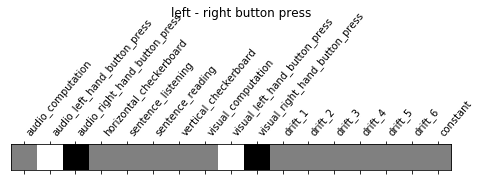

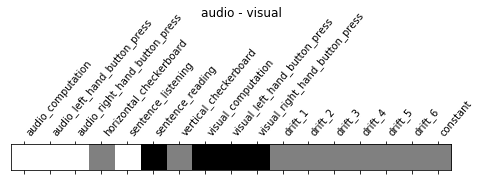

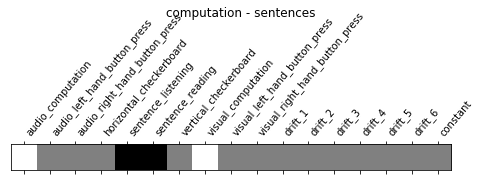

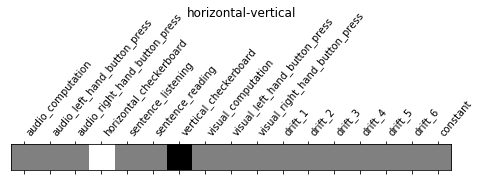

In [62]:
import matplotlib.pyplot as plt
contrasts = make_localizer_contrasts(design_matrix)
from nilearn.plotting import plot_contrast_matrix
for key, values in contrasts.items():
    plot_contrast_matrix(values, design_matrix=design_matrix)
    plt.suptitle(key)

In [63]:
from nilearn import plotting

def plot_contrast(first_level_model):
    """ Given a first model, specify, estimate and plot the main contrasts"""
    design_matrix = first_level_model.design_matrices_[0]
    # Call the contrast specification within the function
    contrasts = make_localizer_contrasts(design_matrix)
    fig = plt.figure(figsize=(11, 3))
    # compute the per-contrast z-map
    for index, (contrast_id, contrast_val) in enumerate(contrasts.items()):
        ax = plt.subplot(1, len(contrasts), 1 + index)
        z_map = first_level_model.compute_contrast(
            contrast_val, output_type='z_score')
        plotting.plot_stat_map(
            z_map, display_mode='z', threshold=3.0, title=contrast_id,
            axes=ax, cut_coords=1)

/Users/martinszinte/anaconda3/envs/idp/lib/python3.7/site-packages/nilearn/_utils/glm.py:300: RuntimeWarning: divide by zero encountered in true_divide
  return np.where(X <= 0, 0, 1. / X)


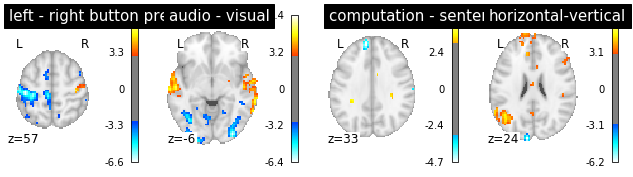

In [64]:
plot_contrast(first_level_model)